In [3]:
import os
import random
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# Data cleaning and preperation

In [3]:
data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\metacritic.csv')
data.columns

Index(['Game', 'Metascore', 'UserScore', 'Publisher', 'ReleaseDate', 'Genre',
       'NumberOfOnlinePlayers', 'Cast', 'Credits', 'CriticsReviews',
       'UserReviews'],
      dtype='object')

In [4]:
#Drop NAN
data = data[data['CriticsReviews'].notna()]

In [5]:
#Check dataset
data['CriticsReviews']

0        [{'CriticName': None, 'CriticScore': '75', 'Cr...
1        [{'CriticName': None, 'CriticScore': '70', 'Cr...
2        [{'CriticName': 'Electronic Gaming Monthly', '...
3        [{'CriticName': None, 'CriticScore': '100', 'C...
4        [{'CriticName': None, 'CriticScore': '80', 'Cr...
                               ...                        
49825    [{'CriticName': None, 'CriticScore': '100', 'C...
49850    [{'CriticName': None, 'CriticScore': '70', 'Cr...
49860    [{'CriticName': None, 'CriticScore': '30', 'Cr...
49866    [{'CriticName': None, 'CriticScore': '85', 'Cr...
49874    [{'CriticName': None, 'CriticScore': '90', 'Cr...
Name: CriticsReviews, Length: 25529, dtype: object

In [6]:
#Lower case reviews
data['CriticsReviews'] = data['CriticsReviews'].str.lower()

In [7]:
#Remove stopwords
stop = stopwords.words('english')
data['CriticsReviews'] = data['CriticsReviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [8]:
#Create new dataset
sentiment_data = data[['Game', 'CriticsReviews']]
sentiment_data

,Game,CriticsReviews
0,Subnautica: Below Zero,"[{'criticname': none, 'criticscore': '75', 'cr..."
1,AntVentor,"[{'criticname': none, 'criticscore': '70', 'cr..."
2,Pilotwings 64,"[{'criticname': 'electronic gaming monthly', '..."
3,Wave Race 64,"[{'criticname': none, 'criticscore': '100', 'c..."
4,Madden NFL 08,"[{'criticname': none, 'criticscore': '80', 'cr..."
...,...,...
49825,GORN,"[{'criticname': none, 'criticscore': '100', 'c..."
49850,Citizens of Space,"[{'criticname': none, 'criticscore': '70', 'cr..."
49860,Bear With Me: The Lost Robots,"[{'criticname': none, 'criticscore': '30', 'cr..."
49866,Journey,"[{'criticname': none, 'criticscore': '85', 'cr..."


In [9]:
#Split reviews into rows
sentiment_data = sentiment_data.drop('CriticsReviews', axis=1).join(sentiment_data['CriticsReviews'].str.split(']', expand=True).stack().reset_index(level=1, drop=True).rename('CriticsReviews'))

In [10]:
#Drop columns with NaN
sentiment_data['CriticsReviews'] = sentiment_data['CriticsReviews'].dropna()

In [11]:
#Drop empty columns
sentiment_data = sentiment_data[sentiment_data.CriticsReviews != '']

In [12]:
#Check dataset
sentiment_data

,Game,CriticsReviews
0,Subnautica: Below Zero,"[{'criticname': none, 'criticscore': '75', 'cr..."
1,AntVentor,"[{'criticname': none, 'criticscore': '70', 'cr..."
2,Pilotwings 64,"[{'criticname': 'electronic gaming monthly', '..."
3,Wave Race 64,"[{'criticname': none, 'criticscore': '100', 'c..."
4,Madden NFL 08,"[{'criticname': none, 'criticscore': '80', 'cr..."
...,...,...
49825,GORN,"[{'criticname': none, 'criticscore': '100', 'c..."
49850,Citizens of Space,"[{'criticname': none, 'criticscore': '70', 'cr..."
49860,Bear With Me: The Lost Robots,"[{'criticname': none, 'criticscore': '30', 'cr..."
49866,Journey,"[{'criticname': none, 'criticscore': '85', 'cr..."


In [13]:
''' DATASET IS CREATED ALREADY
#Create csv for sentiment analysis
sentiment_data.to_excel(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\complete_model\sentiment_analysis\seperated_criticreviews.xlsx')

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-13-9b56a3ef69b7>, line 3)

# Data preparation

In [15]:
#Loading sentiment scores
sentimentscores = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\analysis\critic_model\sentiment_analysis\sentimentscores_criticreviews.csv')
sentimentscores.head()

,Game,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord
0,"""Aha! I Found It!"" Hidden Object Game",0,10,11,0.200196
1,"""Aha! I Got It!"" Escape Game",3,2,4,0.090830
2,#Breakforcist Battle,3,6,10,0.164653
3,#DRIVE,-1,3,3,0.090837
4,#Funtime,-21,28,24,0.159769


In [16]:
#Loading sales_data
sales_data = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\vgchartz.csv')
sales_data.head()

,Game,Platform,Publisher,VGChartzScore,CriticScore,TotalSales,ReleaseDate,LastUpdate
0,Grand Theft Auto: Liberty City Stories,PSP,Rockstar Games,N/A,8.8,7.72m,25th Oct 05,NaN
1,Grand Theft Auto: Vice City Stories,PSP,Rockstar Games,N/A,8.4,5.08m,31st Oct 06,NaN
2,Monster Hunter Freedom 3,PSP,Capcom,N/A,N/A,4.87m,01st Dec 10,08th Jan 19
3,Gran Turismo,PSP,Sony Computer Entertainment,7.5,7.7,2.93m,01st Oct 09,NaN
4,Monster Hunter Freedom Unite,PSP,Capcom,N/A,7.7,5.50m,23rd Jun 09,NaN


In [17]:
#merging sentiment and sales data
sentisales = pd.merge(sentimentscores, sales_data, on='Game', how='left')
sentisales.head()

,Game,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord,Platform,Publisher,VGChartzScore,CriticScore,TotalSales,ReleaseDate,LastUpdate
0,"""Aha! I Found It!"" Hidden Object Game",0,10,11,0.200196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""Aha! I Got It!"" Escape Game",3,2,4,0.090830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#Breakforcist Battle,3,6,10,0.164653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#DRIVE,-1,3,3,0.090837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,#Funtime,-21,28,24,0.159769,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Loading metascores 
metacritic = pd.read_csv(r'C:\Users\B.R\Documents\HvA\Master_DDB\MP\Scraper_eWOM\eWOM\spiders\metacritic.csv')
metacritic.head()

,Game,Metascore,UserScore,Publisher,ReleaseDate,Genre,NumberOfOnlinePlayers,Cast,Credits,CriticsReviews,UserReviews
0,Subnautica: Below Zero,NaN,NaN,Bandai Namco Games,"May 14, 2021","ActionAdventure,Adventure,General,Sandbox",NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '75', 'Cr...","[{'UserName': None, 'UserReviewScore': '75', '..."
1,AntVentor,NaN,NaN,LoopyMood,"Apr 23, 2021",NaN,NaN,NaN,NaN,"[{'CriticName': None, 'CriticScore': '70', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."
2,Pilotwings 64,80.0,NaN,Nintendo,"Sep 29, 1996","Simulation,General",1Player,"ShigeruMiyamoto , MakotoWada , YasuyukiOyagi","Designer , Director , CoDirector","[{'CriticName': 'Electronic Gaming Monthly', '...","[{'UserName': None, 'UserReviewScore': '80', '..."
3,Wave Race 64,92.0,NaN,Nintendo,"Nov 1, 1996","Driving,Racing,Snow/Water",1-2Players,"ShigeruMiyamoto , HiroshiYamauchi","Designer , Director","[{'CriticName': None, 'CriticScore': '100', 'C...","[{'UserName': None, 'UserReviewScore': '60', '..."
4,Madden NFL 08,75.0,NaN,EA Sports,"Aug 14, 2007",EATiburon,"Sports,Traditional,Football,Sim",Himself,VoiceActor:JohnMadden,"[{'CriticName': None, 'CriticScore': '80', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."


In [19]:
finaldata = pd.merge(sentisales, metacritic, on='Game', how='left')
finaldata.head()

,Game,StdDev_Sentiment,TotalNegative,TotalPositive,StdDev_ContainWord,Platform,Publisher_x,VGChartzScore,CriticScore,TotalSales,...,Metascore,UserScore,Publisher_y,ReleaseDate_y,Genre,NumberOfOnlinePlayers,Cast,Credits,CriticsReviews,UserReviews
0,"""Aha! I Found It!"" Hidden Object Game",0,10,11,0.200196,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Ateam,"Jan 25, 2010","Action,Puzzle,General,HiddenObject,General",1-4Players,"HiroyukiKato , TakahiroSuzuki , TakaoHayashi ...","Graphics , Sound , ExecutiveProducer , Planne...",[{'CriticName': 'Official Nintendo Magazine UK...,"[{'UserName': None, 'UserReviewScore': '30', '..."
1,"""Aha! I Got It!"" Escape Game",3,2,4,0.090830,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Ateam,"Nov 2, 2009","Adventure,Puzzle,General,General",1Player,NaN,NaN,[{'CriticName': 'Official Nintendo Magazine UK...,"[{'UserName': None, 'UserReviewScore': '70', '..."
2,#Breakforcist Battle,3,6,10,0.164653,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lucid Sheep Games,"Apr 12, 2018","Puzzle,General",NoOnlineMultiplayer,NaN,NaN,"[{'CriticName': None, 'CriticScore': '80', 'Cr...","[{'UserName': None, 'UserReviewScore': '55', '..."
3,#DRIVE,-1,3,3,0.090837,NaN,NaN,NaN,NaN,NaN,...,69.0,NaN,PM Studios Inc.,"Feb 16, 2021","Racing,Arcade,Automobile",NoOnlineMultiplayer,NaN,NaN,"[{'CriticName': None, 'CriticScore': '90', 'Cr...","[{'UserName': None, 'UserReviewScore': '80', '..."
4,#Funtime,-21,28,24,0.159769,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,The Quantum Astrophysicists Guild,"Jul 16, 2020","Action,Shooter,Shoot-'Em-Up,Top-Down",NoOnlineMultiplayer,NaN,NaN,"[{'CriticName': None, 'CriticScore': '70', 'Cr...","[{'UserName': None, 'UserReviewScore': '70', '..."


In [20]:
finaldata.dropna(subset = ['StdDev_ContainWord', 'UserScore', 'TotalSales'], inplace=True)

In [21]:
#Remove Letter M from sales data
finaldata['TotalSales'] = finaldata['TotalSales'].map(lambda x: x.rstrip('m'))

In [22]:
#validation on null data and NaNs in dataset
print(finaldata[['StdDev_ContainWord', 'UserScore', 'TotalSales']].isnull().sum())
print(finaldata[['StdDev_ContainWord', 'UserScore', 'TotalSales']].isna().sum())

StdDev_ContainWord    0
UserScore             0
TotalSales            0
dtype: int64
StdDev_ContainWord    0
UserScore             0
TotalSales            0
dtype: int64


# Multivariate regression


In [23]:
#importing statsmodels package for statistical analysis
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [24]:
#define X and Y dependent and independent variables
X = finaldata[['StdDev_ContainWord', 'UserScore']].astype(float)
y = finaldata['TotalSales'].astype(float)

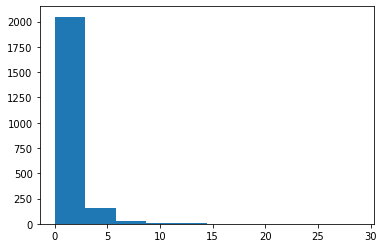

In [25]:
#check distribution of the data
plt.hist(y, bins=10)
plt.show()

In [26]:
#apply data tranformation with log transformation
y = np.log(y+1)

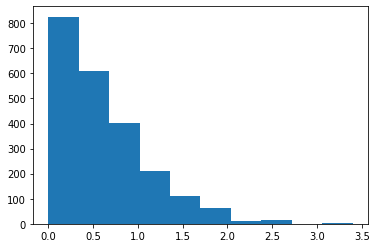

In [27]:
#check distribution of data again
plt.hist(y, bins=10)
plt.show()

In [28]:
#adding a constant (Y-intercept)
X = sm.add_constant(X)

In [29]:
#define model
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

In [30]:
#print regression results
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             TotalSales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     35.69
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           5.49e-16
Time:                        19:05:15   Log-Likelihood:                -1672.8
No. Observations:                2252   AIC:                             3352.
Df Residuals:                    2249   BIC:                             3369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1668      0